In [4]:
from common import *

In [5]:
data = pd.read_csv(ROC_PATH / 'DeepCoFFEA'/ 'thresholds_global_local.csv')
data['Classifier'] = 'DeepCoFFEA'

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `threshold-crop.pdf'.


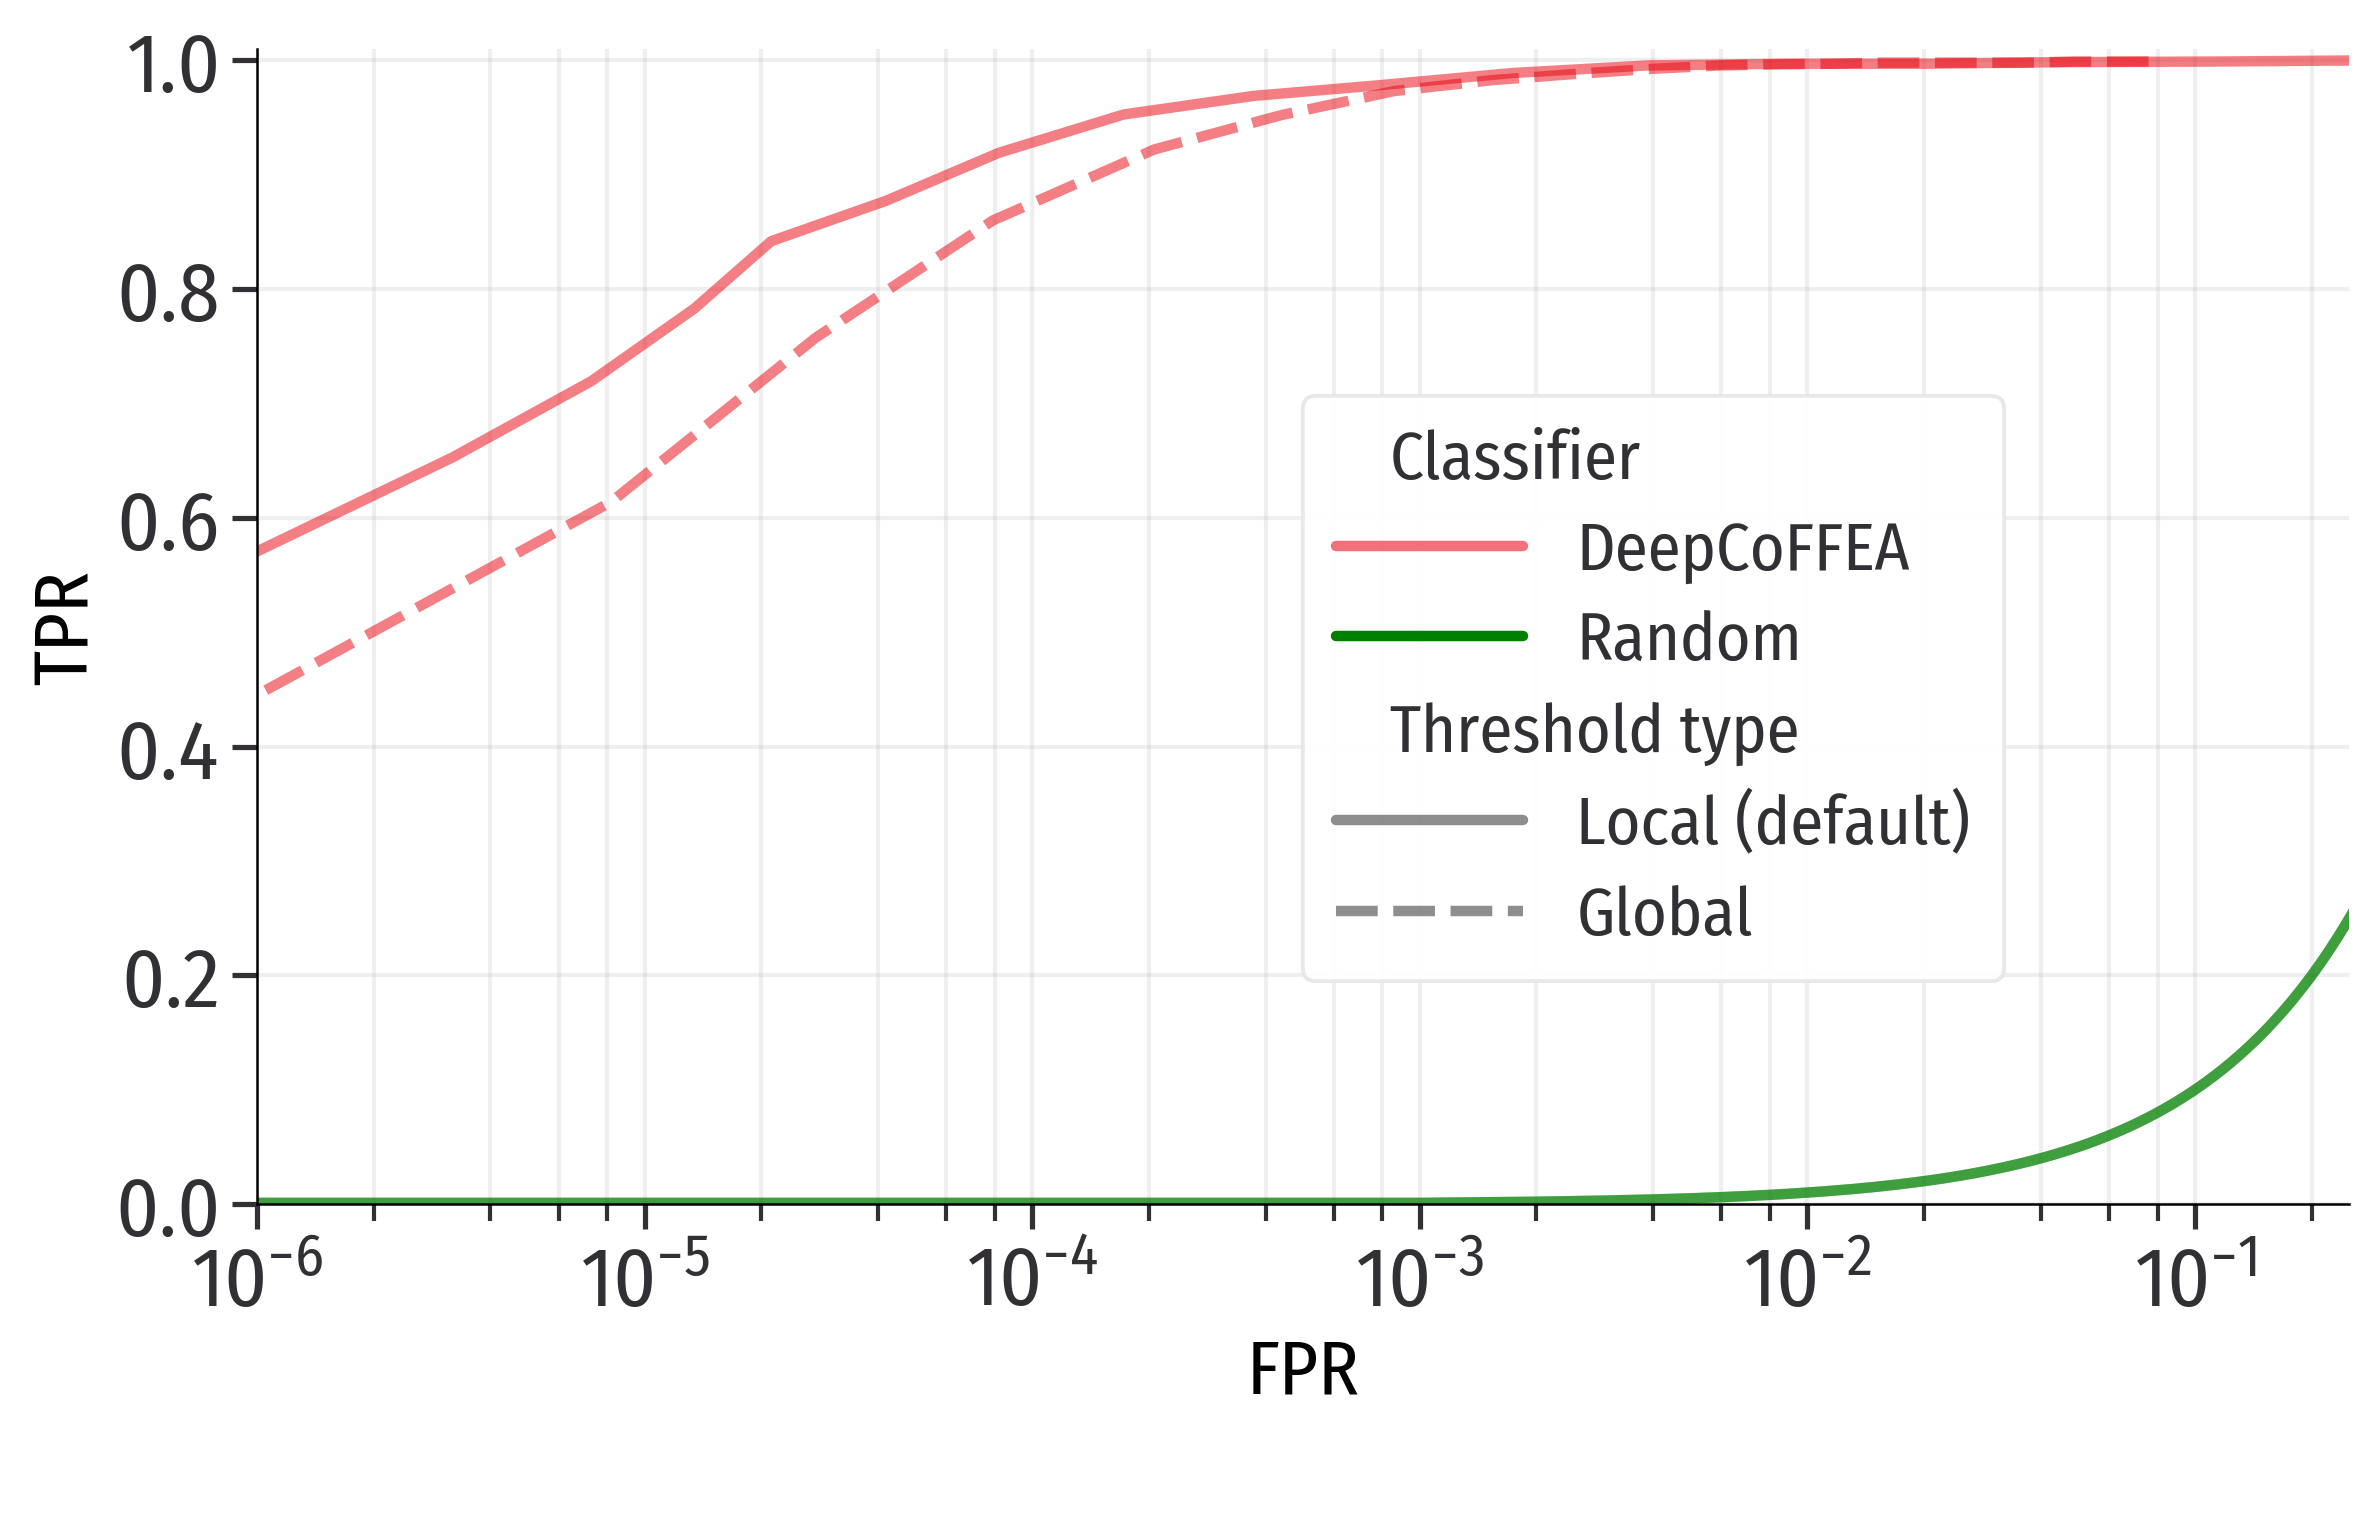

In [6]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)

g = sns.lineplot(data=data, x='FPR', y='TPR', style='Global', hue='Classifier', legend='full', ci=None, palette=[red])

# line for random classifier
diag = np.arange(0, 1, 0.001)
sns.lineplot(x=diag, y=diag, color='green', linestyle='-')

plot_random_classifier(g)
set_log_scale(g)

# custom legend
handles, labels = g.get_legend_handles_labels()
labels[2] = 'Threshold type'
labels[3] = 'Local (default)'
labels[4] = 'Global'
handles.insert(2, Line2D([0],[0], color="green",))
labels.insert(2, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         bbox_to_anchor=(0.5, 0.7),
                         loc='upper left',
                         borderpad=0.5,
                         ncol=1)
g.add_artist(windows_leg)

# Legend titles to the left
for vpack in windows_leg._legend_handle_box.get_children():
    vpack.get_children()[0].get_children()[0].set_width(0)
    vpack.get_children()[3].get_children()[0].set_width(0)

save_fig('threshold')